# 1.Importando módulos básicos

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2.Importando data_to_model.csv

In [193]:
data = pd.read_csv("../data/data_to_model.csv")
data.head()

,gender,height,weight,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,TAS,TAD,PP,bmi,fram,esc
0,f,168,62.0,normal,normal,no,no,si,0,50,110.0,80.0,30.0,21.97,13,0
1,m,156,85.0,alto,normal,no,no,si,1,55,140.0,90.0,50.0,34.93,15,5
2,m,165,64.0,alto,normal,no,no,no,1,51,130.0,70.0,60.0,23.51,12,6
3,f,169,82.0,normal,normal,no,no,si,1,48,150.0,100.0,50.0,28.71,23,1
4,m,156,56.0,normal,normal,no,no,no,0,47,100.0,60.0,40.0,23.01,14,1


In [194]:
data.shape

(67353, 16)

# 3.Variables categóricas: Usando OneHotEncoder

**Usando OneHotEncoder de la clase 23: 5_checkpoint_video**

In [195]:
from sklearn.preprocessing import OneHotEncoder

In [196]:
#Seleccionamos las variables categoricas para transformarlas en dummies
categoricals = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]

enc = OneHotEncoder(drop = "first")
X = data[categoricals]
enc.fit(X)
enc.categories_

[array(['f', 'm'], dtype=object),
 array(['alto', 'limitrofe', 'normal'], dtype=object),
 array(['diabetes', 'normal', 'prediabetes'], dtype=object),
 array(['no', 'si'], dtype=object),
 array(['no', 'si'], dtype=object),
 array(['no', 'si'], dtype=object)]

In [197]:
#Observar que en total tenemos 14 categorias, por lo tanto deberia crear 8 columnas dummie (n-1 * 6)

for i in categoricals:
    print(data[i].unique())

['f' 'm']
['normal' 'alto' 'limitrofe']
['normal' 'prediabetes' 'diabetes']
['no' 'si']
['no' 'si']
['si' 'no']


In [198]:
#Transformo data[categoricals] en un array de n-1 columnas

dummies = enc.transform(X).toarray()
dummies

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 1.]])

In [199]:
#Vemos que tiene 8 columnas

dummies.shape

(67353, 8)

In [200]:
#Ahora lo transformamos a df

dummies_df = pd.DataFrame(dummies)
dummies_df

,0,1,2,3,4,5,6,7
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
67348,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
67349,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
67350,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
67351,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [201]:
range(len(categoricals))

range(0, 6)

In [202]:
#Le cambio el nombre a las columnas

col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals))] 
                                                                 #range(len(categoricals)) = 0 a 6
col_names

[array(['gender_f', 'gender_m'], dtype=object),
 array(['cholesterol_alto', 'cholesterol_limitrofe', 'cholesterol_normal'],
       dtype=object),
 array(['gluc_diabetes', 'gluc_normal', 'gluc_prediabetes'], dtype=object),
 array(['smoke_no', 'smoke_si'], dtype=object),
 array(['alco_no', 'alco_si'], dtype=object),
 array(['active_no', 'active_si'], dtype=object)]

In [203]:
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
col_names_drop_first

['gender_m',
 'cholesterol_limitrofe',
 'cholesterol_normal',
 'gluc_normal',
 'gluc_prediabetes',
 'smoke_si',
 'alco_si',
 'active_si']

In [204]:
dummies_df.columns = col_names_drop_first
dummies_df

,gender_m,cholesterol_limitrofe,cholesterol_normal,gluc_normal,gluc_prediabetes,smoke_si,alco_si,active_si
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
67348,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
67349,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
67350,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
67351,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


**Agrego variables dummy a las columnas con datos numéricos**

In [205]:
variables_numericas = ["height", "weight", "AgeinYr", "TAS", "TAD", "PP", "bmi", "fram", "esc"]
data_numerica = data[variables_numericas]
data_numerica.head()

,height,weight,AgeinYr,TAS,TAD,PP,bmi,fram,esc
0,168,62.0,50,110.0,80.0,30.0,21.97,13,0
1,156,85.0,55,140.0,90.0,50.0,34.93,15,5
2,165,64.0,51,130.0,70.0,60.0,23.51,12,6
3,169,82.0,48,150.0,100.0,50.0,28.71,23,1
4,156,56.0,47,100.0,60.0,40.0,23.01,14,1


In [206]:
data_final = pd.concat([dummies_df, data_numerica,data["cardio"]], axis = 1)
data_final.head()

,gender_m,cholesterol_limitrofe,cholesterol_normal,gluc_normal,gluc_prediabetes,smoke_si,alco_si,active_si,height,weight,AgeinYr,TAS,TAD,PP,bmi,fram,esc,cardio
0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,168,62.0,50,110.0,80.0,30.0,21.97,13,0,0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,156,85.0,55,140.0,90.0,50.0,34.93,15,5,1
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,165,64.0,51,130.0,70.0,60.0,23.51,12,6,1
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,169,82.0,48,150.0,100.0,50.0,28.71,23,1,1
4,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,156,56.0,47,100.0,60.0,40.0,23.01,14,1,0


In [207]:
data_final.shape

(67353, 18)

# 4.Creando sets de entrenamiento y testeo

In [208]:
X = data_final.drop("cardio", axis = 1)
y = data_final["cardio"]

In [209]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = data_final["gender_m"], random_state = 123)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(50514, 17) (16839, 17) (50514,) (16839,)


# 5.Variables numéricas: Estandarizando los datos

In [210]:
from sklearn.preprocessing import StandardScaler  

In [211]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [212]:
X_test = scaler.transform(X_test)

# 6.KNN

In [223]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [224]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred).round(2)
print("El accuracy_score es: ", accuracy)

El accuracy_score es:  0.72


## 6.1 Qué sucede si elijo vecinos entre 1 y 25?

In [218]:
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
scores

[0.6373300077201735,
 0.6430904448007602,
 0.6779499970307026,
 0.677415523487143,
 0.688877011699032,
 0.6948749925767563,
 0.7001603420630679,
 0.704792446107251,
 0.7094839361007186,
 0.7122156897678009,
 0.7108498129342598,
 0.7149474434348833,
 0.712512619514223,
 0.7133440228042045,
 0.7154819169784429,
 0.7155413029277273,
 0.7156006888770117,
 0.7160757764712868,
 0.7167884078626997,
 0.7180355127976721,
 0.7186887582398005,
 0.7178573549498188,
 0.7193420036819289,
 0.7199358631747729,
 0.7203515648197636]

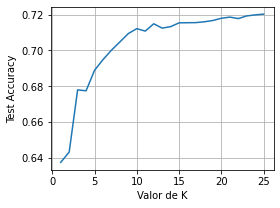

In [219]:
plt.figure(figsize=(4,3))
plt.plot(k_range, scores)
plt.xlabel('Valor de K'); plt.ylabel('Test Accuracy')
plt.grid(); plt.show()

In [220]:
l =  [i for i,val in enumerate(scores) if val==max(scores)]
print('Mínimo K de todos los que tienen máximo score: ', min(l) + 1)
print('Máximo K de todos los que tienen máximo score: ', max(l) + 1)

Mínimo K de todos los que tienen máximo score:  25
Máximo K de todos los que tienen máximo score:  25


In [ ]:
agregar aca gridsearchcv

In [35]:
asdasdasdasdasd

NameError: name 'asdasdasdasdasd' is not defined

In [ ]:
#Seleccionamos las variables categoricas para transformarlas en dummies
categoricals = ['cut', 'color', 'clarity']

#Importo la libreria
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(drop='first')  #Instancio el objeto. La cant de dummies es de n-1 (x eso el drop first)
X = data[categoricals]
enc.fit(X) #Ajusto a mis variables categoricas
enc.categories_

In [ ]:
#Observar que en total tenemos 20 categorias, por lo tanto deberia crear 17 columnas dummie (n-1 * 3)
print(data["cut"].unique(),
data["color"].unique(),
data["clarity"].unique())

In [ ]:
#Transformo data[categoricals] en un array de n-1 columnas
dummies = enc.transform(X).toarray()
dummies

In [ ]:
#Ahora lo transformamos a df
dummies_df = pd.DataFrame(dummies)
dummies_df

In [ ]:
#Le cambio el nombre a las columnas

col_names = [categoricals[i] + '_' + enc.categories_[i] for i in range(len(categoricals))] 
                                                                 #range(len(categoricals)) = 0 a 6
col_names

In [ ]:
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
col_names_drop_first

In [ ]:
dummies_df.columns = col_names_drop_first
dummies_df